In [1]:
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
healthexp = sns.load_dataset('healthexp')

In [3]:
type(healthexp)

pandas.core.frame.DataFrame

In [4]:
healthexp.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [5]:
healthexp.tail()

,Year,Country,Spending_USD,Life_Expectancy
269,2020,Germany,6938.983,81.1
270,2020,France,5468.418,82.3
271,2020,Great Britain,5018.700,80.4
272,2020,Japan,4665.641,84.7
273,2020,USA,11859.179,77.0


In [6]:
healthexp.describe()

,Year,Spending_USD,Life_Expectancy
count,274.000000,274.000000,274.000000
mean,1996.992701,2789.338905,77.909489
std,14.180933,2194.939785,3.276263
min,1970.000000,123.993000,70.600000
25%,1985.250000,1038.357000,75.525000
50%,1998.000000,2295.578000,78.100000
75%,2009.000000,4055.610000,80.575000
max,2020.000000,11859.179000,84.700000


In [8]:
print(healthexp.columns)
print(healthexp.info())
print(healthexp.isnull().sum())


Index(['Year', 'Country', 'Spending_USD', 'Life_Expectancy'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274 entries, 0 to 273
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Year             274 non-null    int64  
 1   Country          274 non-null    object 
 2   Spending_USD     274 non-null    float64
 3   Life_Expectancy  274 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 8.7+ KB
None
Year               0
Country            0
Spending_USD       0
Life_Expectancy    0
dtype: int64


In [13]:
print(healthexp['Country'].value_counts())

Country
USA              51
Japan            51
Germany          50
Canada           44
Great Britain    43
France           35
Name: count, dtype: int64


In [15]:
healthexp['Country'].nunique()

6

In [20]:
healthexp.groupby('Country')['Life_Expectancy'].agg('mean')

,Life_Expectancy
Country,
Canada,78.706818
France,79.565714
Germany,76.726000
Great Britain,77.620930
Japan,79.554902
USA,75.843137


In [23]:
unique_countries = healthexp['Country'].unique()

In [24]:
for country in unique_countries:
    subset = healthexp[healthexp['Country'] == country]
    print(f"Stats for {country}:")
    print(f"  Mean life expectancy: {subset['Life_Expectancy'].mean():.2f}")
    print(f"  Count: {len(subset)}")
    print()


Stats for Germany:
  Mean life expectancy: 76.73
  Count: 50

Stats for France:
  Mean life expectancy: 79.57
  Count: 35

Stats for Great Britain:
  Mean life expectancy: 77.62
  Count: 43

Stats for Japan:
  Mean life expectancy: 79.55
  Count: 51

Stats for USA:
  Mean life expectancy: 75.84
  Count: 51

Stats for Canada:
  Mean life expectancy: 78.71
  Count: 44



In [25]:
import matplotlib.pyplot as plt

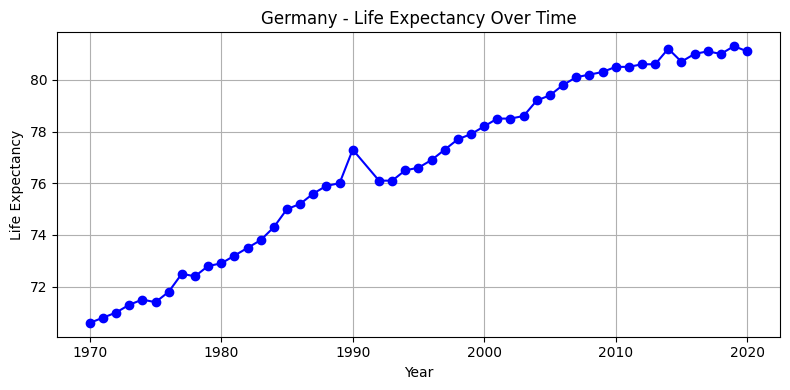

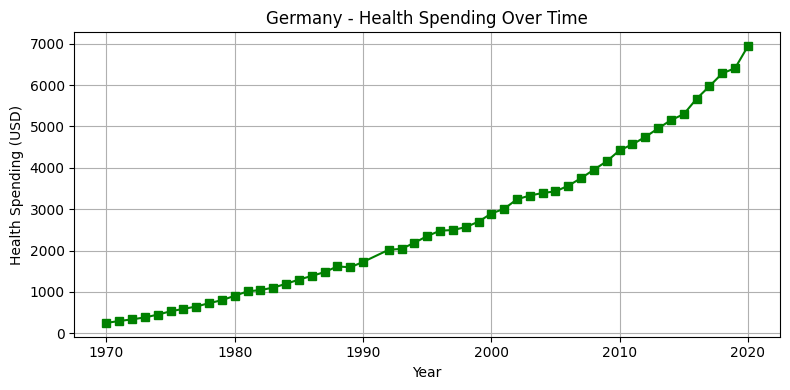

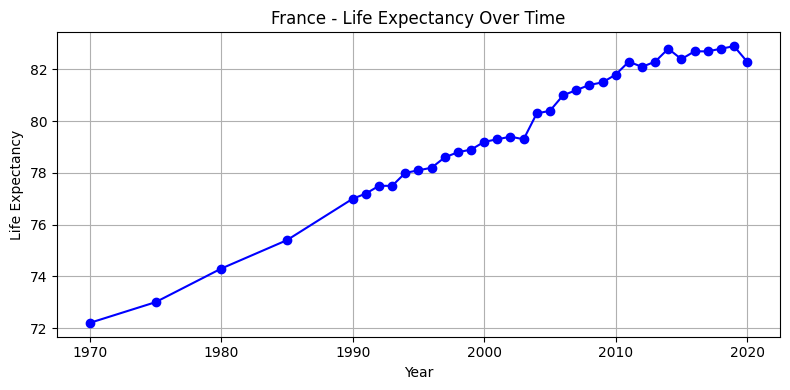

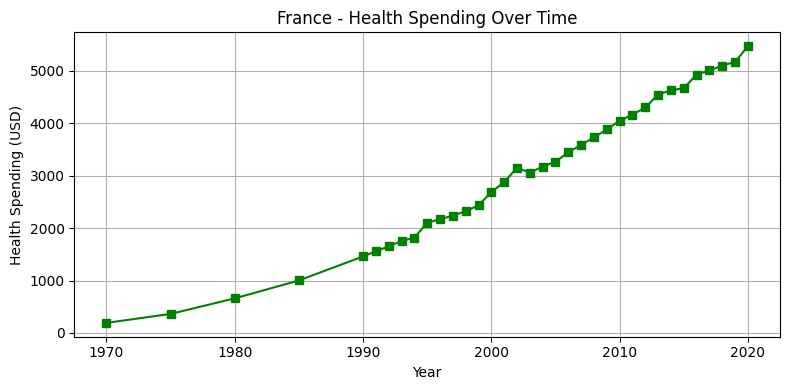

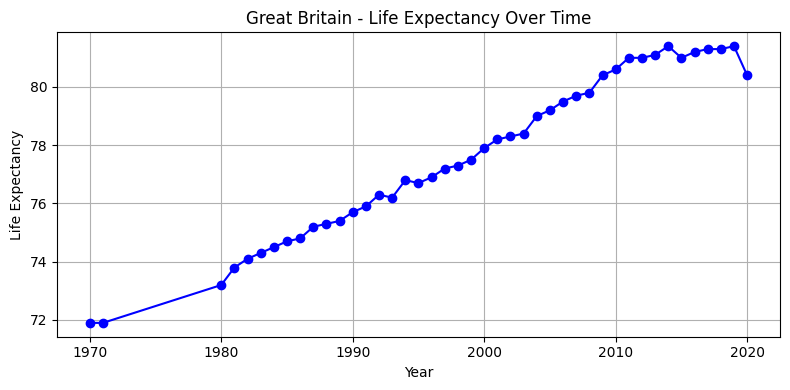

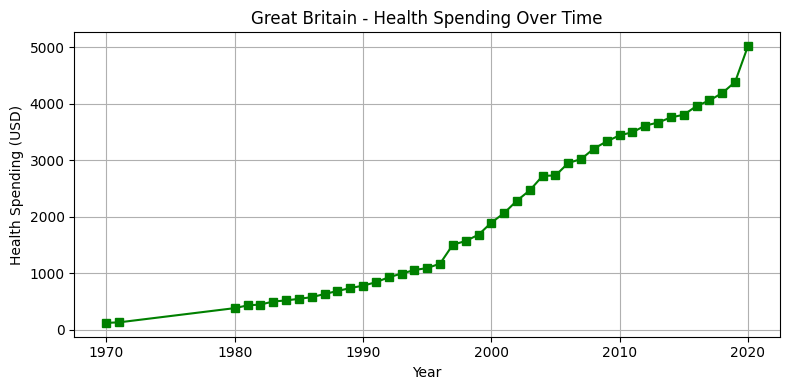

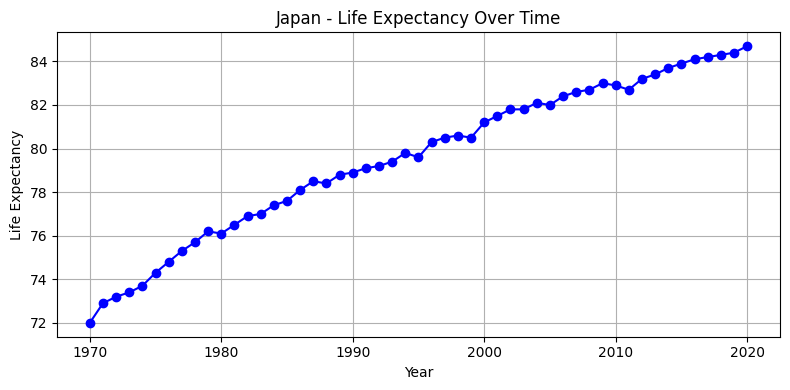

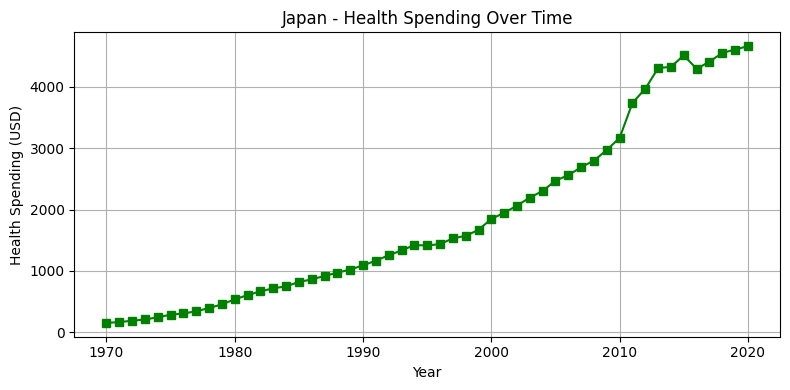

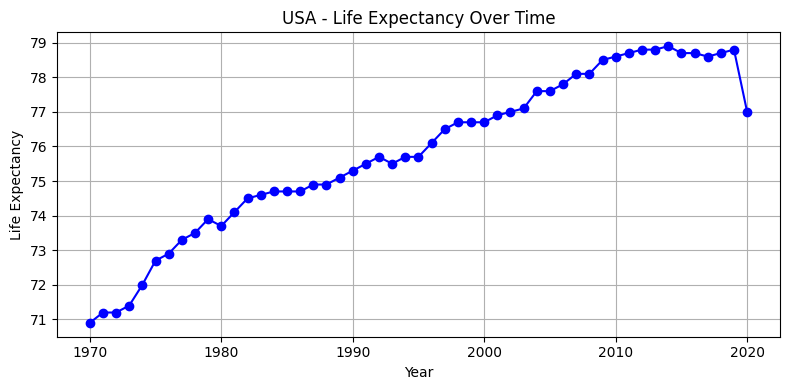

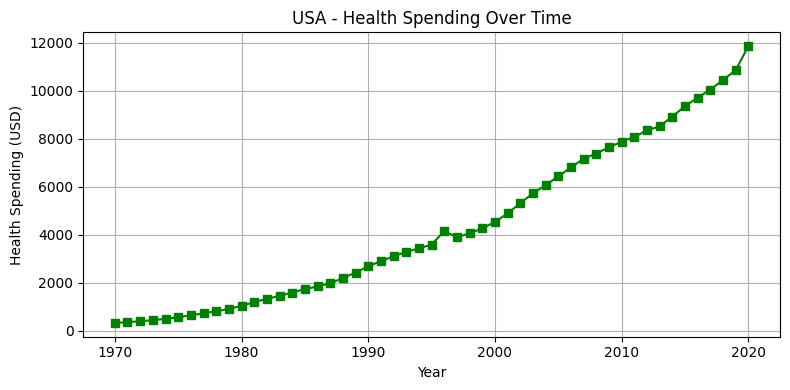

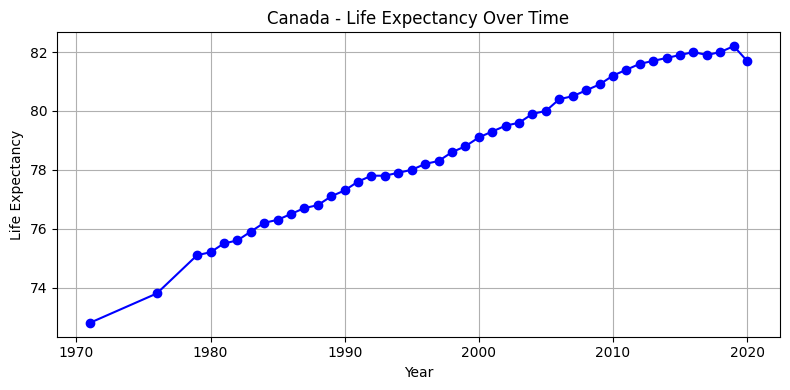

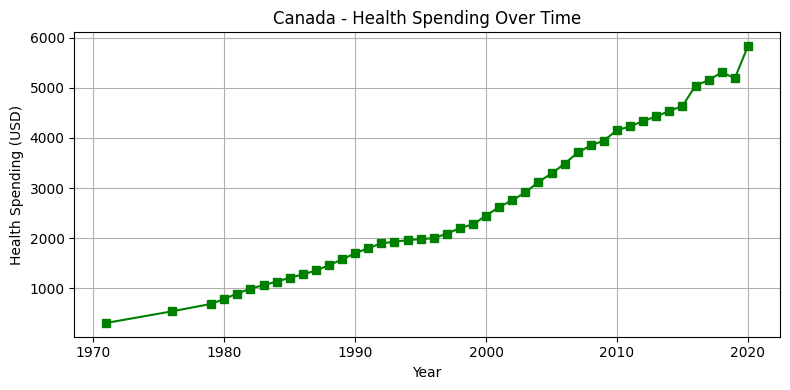

In [27]:
for country in unique_countries:
    subset = healthexp[healthexp['Country'] == country]

    plt.figure(figsize=(8, 4))
    plt.plot(subset['Year'], subset['Life_Expectancy'], marker='o', color='blue')
    plt.title(f"{country} - Life Expectancy Over Time")
    plt.xlabel("Year")
    plt.ylabel("Life Expectancy")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    plt.figure(figsize=(8, 4))
    plt.plot(subset['Year'], subset['Spending_USD'], marker='s', color='green')
    plt.title(f"{country} - Health Spending Over Time")
    plt.xlabel("Year")
    plt.ylabel("Health Spending (USD)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

Thoughts: Dip in Life Expectancy in 2020

- In the year 2020, 5 out of 6 observed countries showed a clear **dip in life expectancy**.
- The **sharpest drop** was in the **United States**, I am assuming due to:
  - Misinformation and anti-vaccine sentiment
  - Weak public health measures and inconsistent policy
  - Govt. itself leans towards these sentiments, its not "conspiracy" there instead the mis information is actually pro-establishment
  
- **Japan** stood out as the **only country with no dip**, due to:
  - Strong mask culture and early pandemic response
  - High trust in government health advisories
  - Lower comorbidity prevalence (e.g., obesity, diabetes)
  - Interestingly, it has the lowest increase in health spending instead of sharp increases in 2020 like the other countries
- **Canada** had a dip, but it was **much smaller than the US**, possibly due to:
  - Better managed lockdowns and health messaging
  - Public trust in healthcare and vaccine uptake


In [28]:
y = healthexp['Life_Expectancy']

In [29]:
healthexp = pd.get_dummies(healthexp)

In [30]:
healthexp.head()

,Year,Spending_USD,Life_Expectancy,Country_Canada,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
0,1970,252.311,70.6,False,False,True,False,False,False
1,1970,192.143,72.2,False,True,False,False,False,False
2,1970,123.993,71.9,False,False,False,True,False,False
3,1970,150.437,72.0,False,False,False,False,True,False
4,1970,326.961,70.9,False,False,False,False,False,True


In [31]:
X = healthexp.drop('Life_Expectancy', axis=1)

In [32]:
X.head()

,Year,Spending_USD,Country_Canada,Country_France,Country_Germany,Country_Great Britain,Country_Japan,Country_USA
0,1970,252.311,False,False,True,False,False,False
1,1970,192.143,False,True,False,False,False,False
2,1970,123.993,False,False,False,True,False,False
3,1970,150.437,False,False,False,False,True,False
4,1970,326.961,False,False,False,False,False,True


In [33]:
y = healthexp['Life_Expectancy']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
rfr = RandomForestRegressor(random_state = 42)

In [38]:
rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [39]:
y_pred = rfr.predict(X_test)

In [40]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [41]:
mean_squared_error(y_test, y_pred)

0.12436518181817355

In [42]:
mean_absolute_error(y_test, y_pred)

0.274527272727264

In [43]:
r2_score(y_test, y_pred)

0.9898132982462418

In [45]:
!pip install -q optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 17.0 MB/s eta 0:00:00


In [46]:
import optuna

In [47]:
from sklearn.model_selection import cross_val_score

In [56]:
def objective(trial):
    n_estimators = trial.suggest_int('n_estimators', 100, 1000)
    max_depth = trial.suggest_int('max_depth', 10, 50)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 32)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 32)

    model = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    score = cross_val_score(
        model, X_train, y_train,
        cv=5,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    mean_rmse = (-score.mean())**0.5  # Convert MSE to RMSE (positive)

    return mean_rmse  # Optuna will minimize this


In [57]:
study = optuna.create_study(direction='minimize', sampler=optuna.samplers.RandomSampler(seed=42))


[I 2025-06-09 06:17:43,184] A new study created in memory with name: no-name-b1cb8062-6867-4c78-9ae0-98e92b0d3ac7


In [58]:
study.optimize(objective, n_trials= 100)

[I 2025-06-09 06:17:50,799] Trial 0 finished with value: 1.5424482458302924 and parameters: {'n_estimators': 437, 'max_depth': 48, 'min_samples_split': 24, 'min_samples_leaf': 20}. Best is trial 0 with value: 1.5424482458302924.
[I 2025-06-09 06:17:52,467] Trial 1 finished with value: 1.7123411532120452 and parameters: {'n_estimators': 240, 'max_depth': 16, 'min_samples_split': 3, 'min_samples_leaf': 28}. Best is trial 0 with value: 1.5424482458302924.
[I 2025-06-09 06:17:56,059] Trial 2 finished with value: 1.8548507287504676 and parameters: {'n_estimators': 641, 'max_depth': 39, 'min_samples_split': 2, 'min_samples_leaf': 32}. Best is trial 0 with value: 1.5424482458302924.
[I 2025-06-09 06:18:01,170] Trial 3 finished with value: 0.9437819298688408 and parameters: {'n_estimators': 850, 'max_depth': 18, 'min_samples_split': 7, 'min_samples_leaf': 6}. Best is trial 3 with value: 0.9437819298688408.
[I 2025-06-09 06:18:04,685] Trial 4 finished with value: 1.272485058504795 and parameter

In [59]:
print(f"Best Score: {study.best_value}")
print(f"Best Params: {study.best_params}")
print(f"Best Trial: {study.best_trial}")
print(f"Best Trial Params: {study.best_trial.params}")

Best Score: 0.48522696193573644
Best Params: {'n_estimators': 276, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 1}
Best Trial: FrozenTrial(number=92, state=1, values=[0.48522696193573644], datetime_start=datetime.datetime(2025, 6, 9, 6, 23, 8, 480145), datetime_complete=datetime.datetime(2025, 6, 9, 6, 23, 10, 203170), params={'n_estimators': 276, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 1}, user_attrs={}, system_attrs={}, intermediate_values={}, distributions={'n_estimators': IntDistribution(high=1000, log=False, low=100, step=1), 'max_depth': IntDistribution(high=50, log=False, low=10, step=1), 'min_samples_split': IntDistribution(high=32, log=False, low=2, step=1), 'min_samples_leaf': IntDistribution(high=32, log=False, low=1, step=1)}, trial_id=92, value=None)
Best Trial Params: {'n_estimators': 276, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 1}


In [60]:
optuna.visualization.plot_optimization_history(study)

In [61]:
optuna.visualization.plot_parallel_coordinate(study)

In [62]:
optuna.visualization.plot_slice(study, params = ['n_estimators', 'max_depth', 'min_samples_split', 'min_samples_leaf'])

In [63]:
optuna.visualization.plot_param_importances(study)

In [64]:
best_params = study.best_params
best_n_estimators = best_params['n_estimators']
best_max_depth = best_params['max_depth']
best_min_samples_split = best_params['min_samples_split']
best_min_samples_leaf = best_params['min_samples_leaf']


In [65]:
best_model = RandomForestRegressor(
    n_estimators=best_n_estimators,
    max_depth=best_max_depth,
    min_samples_split=best_min_samples_split,
    min_samples_leaf=best_min_samples_leaf)

In [66]:
best_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, min_samples_split=5, n_estimators=276)

In [67]:
y_pred = best_model.predict(X_test)

In [68]:
mean_absolute_error(y_test, y_pred) # worse than default parameters


0.32304023721118486

In [69]:
mean_squared_error(y_test, y_pred)

0.15467207849474812

In [70]:
r2_score(y_test, y_pred)

0.987330872594522